In [310]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
data = pd.read_csv('monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv')
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2249,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2250,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2251,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2252,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [311]:
data = data.dropna(subset=['WERT'])
data = data[data['MONAT'] != 'Summe']
data['MONAT'] = data['MONAT'].str[-2:].astype(int) #i want the month part, so last two digits are taken

In [312]:
str_int = {category: idx for idx, category in enumerate(data['MONATSZAHL'].unique())} #i am changing the string in monatszahl to integer
data['MONATSZAHL'] = data['MONATSZAHL'].map(str_int)

auspraegung_str_int = {auspraegung_category: idx for idx, auspraegung_category in enumerate(data['AUSPRAEGUNG'].unique())} #similar to above for auspraegung
data['AUSPRAEGUNG'] = data['AUSPRAEGUNG'].map(auspraegung_str_int)

new_data = data[(data['MONATSZAHL'] == str_int['Alkoholunfälle']) & (data['AUSPRAEGUNG'] == auspraegung_str_int['insgesamt']) &
                (data['JAHR'] < 2021)] #until 2020
new_data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
51,0,0,2020,1,28.0,22.0,-20.00,27.27,37.0
52,0,0,2020,2,40.0,28.0,42.86,42.86,38.0
53,0,0,2020,3,27.0,34.0,-32.50,-20.59,37.0
54,0,0,2020,4,26.0,36.0,-3.70,-27.78,36.0
55,0,0,2020,5,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
317,0,0,2000,8,77.0,NaN,-22.22,NaN,76.0
318,0,0,2000,9,84.0,NaN,9.09,NaN,77.0
319,0,0,2000,10,83.0,NaN,-1.19,NaN,78.0
320,0,0,2000,11,71.0,NaN,-14.46,NaN,77.0


In [313]:
X = new_data[['JAHR', 'MONAT']].values
y = new_data['WERT'].values
model = LinearRegression()
model.fit(X, y)
#predict for the year 2021 and month january (01)
year_2021 = 2021
month_2021 = 1
prediction = model.predict([[year_2021, month_2021]])
print(f"Prediction of number of accidents on Jan 2021: {prediction}")
actual_value = data[(data['MONATSZAHL'] == str_int['Alkoholunfälle']) &
                    (data['AUSPRAEGUNG'] == auspraegung_str_int['insgesamt']) &
                    (data['JAHR'] == year_2021) &
                    (data['MONAT'] == month_2021)]['WERT'].values
print(f"Actual number of accidents on January 2021: {actual_value}")  #comparing both predicted and actual values to know the error

data.iloc[12] #the wert value matches with the excel sheet as 16

Prediction of number of accidents on Jan 2021: [15.82356532]
Actual number of accidents on January 2021: [16.]


MONATSZAHL                           0.00
AUSPRAEGUNG                          0.00
JAHR                              2021.00
MONAT                                1.00
WERT                                16.00
VORJAHRESWERT                       28.00
VERAEND_VORMONAT_PROZENT            23.08
VERAEND_VORJAHRESMONAT_PROZENT     -42.86
ZWOELF_MONATE_MITTELWERT            35.00
Name: 38, dtype: float64

In [314]:
#calculating errors comparing predicted and actual values
mae = mean_absolute_error(actual_value, [prediction[0]])
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(actual_value, [prediction[0]])
print(f'Mean Squared Error (MSE): {mse}')
rmse = mean_squared_error(actual_value, [prediction[0]], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.17643467643574695
Mean Squared Error (MSE): 0.03112919504898672
Root Mean Squared Error (RMSE): 0.17643467643574695


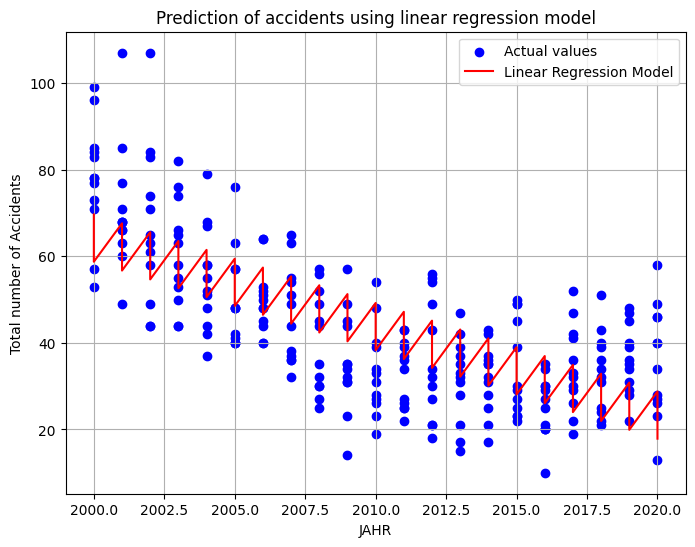

In [315]:
#visualization in the form of plot using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(new_data['JAHR'], new_data['WERT'], color='blue', label='Actual values')
plt.plot(new_data['JAHR'],model.predict(X), color='red', label='Linear Regression Model')
plt.xlabel('JAHR')
plt.ylabel('Total number of Accidents')
plt.title("Prediction of accidents using linear regression model")
plt.legend()
plt.grid()
plt.show() #could not get linear straight line which must represent linear regression model